The implementation of Naive Bayes and Logistic Regression is supposed to be from scratch.

# Naive Bayes (50)

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)} {P(x_1, \dots, x_n)}$

$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$

$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}{P(x_1, \dots, x_n)}$

$\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)\end{aligned}\end{align}$

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters. 

Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

On the flip side, although naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs are not to be taken too seriously.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
np.random.seed(123)

### Dataset
Load the given dataset. The last column contains the labels. 

Preprocess if needed.

In [2]:
# TODO: Load the .txt file

with open("data.txt", 'r') as file:
    line_count = 0
    for line in file:
        line_count += 1

data = list()

with open("data.txt", 'r') as file:
    for i in range(line_count):
        file_contents = file.readline()
        splited = file_contents.split()
        splited[0] = float(splited[0])
        splited[1] = float(splited[1])
        splited[2] = int(splited[2])
        data.append(splited)
data = np.array(data)
print(data)
labels = np.array(data[:,-1])
print(labels)


[[ 0.10635  0.12803  0.     ]
 [ 0.02403 -0.07484  1.     ]
 [ 0.02237  0.01745  0.     ]
 ...
 [-0.15642  0.08101  0.     ]
 [-0.02797 -0.00697  0.     ]
 [ 0.0743  -0.09015  1.     ]]
[0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1

Consider the values of each class. Create a dictionary for the dataset, with classes as keys and the entries of the dataset as values.

In [3]:
def create_class_dictionary(data, labels):
    class_dictionary = {}

    classes = np.unique(labels)

    for class_label in classes:
        class_indices = np.where(labels == class_label)[0]
        class_data = data[class_indices]
        class_dictionary[class_label] = class_data

    return class_dictionary

For the dataset dictionary, find the mean and standard deviation of all classes. The output format should be a list of two lists, the first one the mean and standard deviation of the first column and the second one is for the second column.

In [4]:
def info(data):
    col1 = data[:,0]
    col2 = data[:,1]
    std1 = np.std(col1)
    std2 = np.std(col2)
    mean1 = np.mean(col1)
    mean2 = np.mean(col2)
    column1 = list()
    column1.append(mean1)
    column1.append(std1)
    column2 = list()
    column2.append(mean2)
    column2.append(std2)
    result = [column1,column2]
    return result

In [5]:
def class_info(class_dictionary):
    values0 = []
    values1 = []

    for key, value in my_dict.items():
        if key == 0:
            values0.append(value)
    values = []

    for key, value in my_dict.items():
        if key == 1:
            values1.append(value)
    result0 = info(values0)
    result1 = info(values1)
  #TODO: call the info function to return the mean and standard deviation of each column for each class

### Visualization
Use the imported libraries to visualize the given data. 

Why is the info step valid in this dataset? 
For a dataset with classes labeled as 0 and 1, you can calculate the mean and standard deviation separately for each class. This step is valid under the assumption that the data within each class is approximately normally distributed or can be reasonably approximated by a normal distribution which is true when we see the result of histogram.

What is the type of this dataset's distribution? 
We can see by the histogram of each column that it distributes over normal distribution.

With other distribution types, what action would be needed to obtain the mean and standard variation info?
We can use numpy for obtaining mean and standard variation or we can do it by having the parameters of the normal distribution and calculate them ourselves.

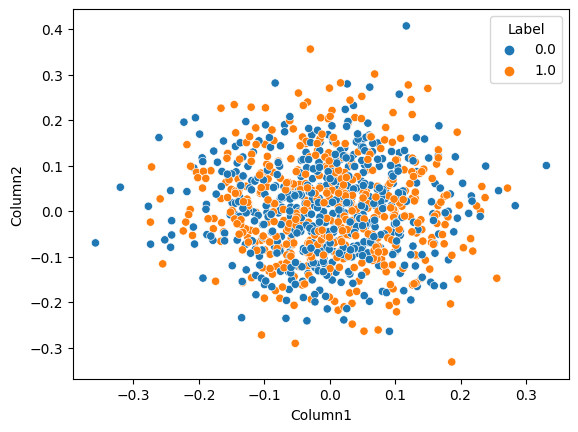

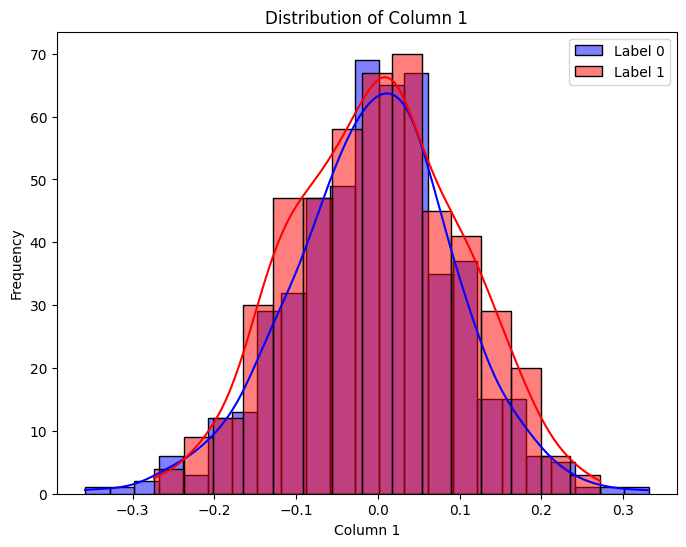

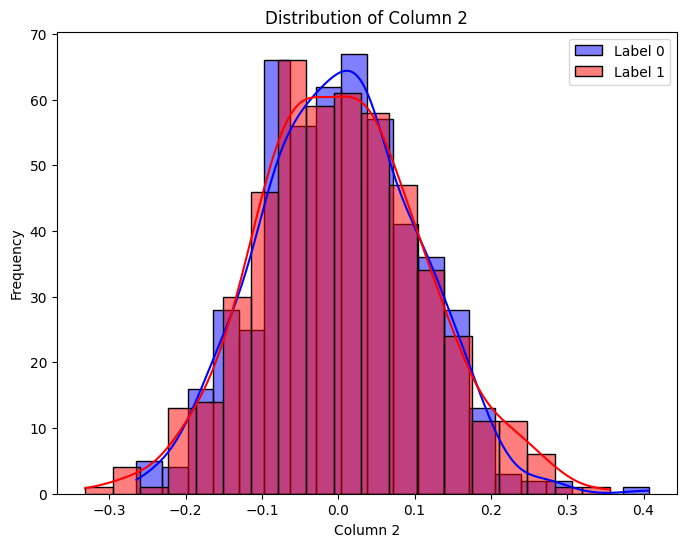

In [6]:
#TODO
df = pd.DataFrame(data, columns=['Column1', 'Column2', 'Label'])
sns.scatterplot(data=df, x='Column1', y='Column2', hue='Label')
plt.show()
data_label_0 = df[df['Label'] == 0]
data_label_1 = df[df['Label'] == 1]
plt.figure(figsize=(8, 6))
sns.histplot(data_label_0['Column1'], kde=True, color='blue', label='Label 0')
sns.histplot(data_label_1['Column1'], kde=True, color='red', label='Label 1')
plt.xlabel('Column 1')
plt.ylabel('Frequency')
plt.title('Distribution of Column 1')
plt.legend()
plt.show()

# Plot histogram for Column2
plt.figure(figsize=(8, 6))
sns.histplot(data_label_0['Column2'], kde=True, color='blue', label='Label 0')
sns.histplot(data_label_1['Column2'], kde=True, color='red', label='Label 1')
plt.xlabel('Column 2')
plt.ylabel('Frequency')
plt.title('Distribution of Column 2')
plt.legend()
plt.show()

### Model Details

As explained above, to create this model, you need a prior function and a likelihood function.

In the likelihood function, you need to calculate the probability of the query belonging to a class. 

In [35]:
# in prior function we iterate over our classes which are 0 and 1 and we find the probability by couting the samples
def prior(class_dictionary, labels):
    prior_probabilities = {}
    for class_label, class_samples in class_dictionary.items():
        prior_probabilities[class_label] = len(class_samples) / len(labels)

    return prior_probabilities

In [37]:
# in likelihood function for each class we the probability of a query belonging to a class
def likelihood(class_dictionary, query):
    likelihood_probabilities = {}

    for class_label, class_samples in class_dictionary.items():
        class_likelihood = 1.0
        for i in range(len(query)):
            class_count = len(class_samples)
            feature_values = [sample[i] for sample in class_samples]
            feature_count = feature_values.count(query[i])
            class_likelihood *= feature_count / class_count

        likelihood_probabilities[class_label] = class_likelihood

    return likelihood_probabilities


### Predict


In [59]:
# in here we want to classify a given query based on trained data
def predict(data, labels, query):
    class_dictionary = create_class_dictionary(data, labels)
    priors = prior(class_dictionary, labels)
    likelihoods = likelihood(class_dictionary, query)
    max= -0.0000001

    for class_label in priors:
        prob = priors[class_label] * likelihoods[class_label]

        if prob > max:
            max= prob
            predicted_class = class_label

    return predicted_class


In [61]:
# in here for each query we use the predict function to see which it belongs to
def NB(data, labels, queries):
    predictions = []

    for query in queries:
        prediction = predict(data, labels, query)
        predictions.append(prediction)

    return predictions


### Test
To test the model, import a suitable dataset from sklearn library to check the accuracy of your model. Then import GaussianNB from sklearn and compare your model's result with it.

In [62]:
from sklearn.model_selection import train_test_split as meow

def train_test_split(data, labels, test_size):
    X_train, X_test, y_train, y_test = meow(data, labels, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [74]:
# ground truth is the true class lables for instances
from sklearn.metrics import accuracy_score
def accuracy(ground_truth, predictions):
    accuracy = accuracy_score(ground_truth,predictions)
    return accuracy

In [81]:
# compare with GaussianNB from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(data, labels,123)
my_model_predictions = NB(X_train, y_train, X_test)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gaussian_predictions = gaussian.predict(X_test)
my_accuracy = accuracy(y_test, my_model_predictions)
gaussian_accuracy = accuracy(y_test, gaussian_predictions)

print("My Naive Bayes Model Accuracy:", my_model_accuracy)
print("GaussianNB Accuracy:", gaussian_accuracy)


My Naive Bayes Model Accuracy: 0.5365853658536586
GaussianNB Accuracy: 1.0


# Linear Regression (35)

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

Ordinary least squares Linear Regression.

LinearRegression from sklearn.linear_model fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In this section, you will implement a simple linear regression model using sklearn. Only the first feature of the diabetes dataset is required for this part.

In [82]:
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model

In [89]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X =  np.array(diabetes_X[:,-1]) # Change this so that your model will use only one feature (arbitary)
size = len(diabetes_y)

442


Split the data into training and testing sets.

In [93]:
# you can use the train_test_split(data, labels, test_size) function from the previous section
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y,123)


Create the model using sklearn. Then train it using the training set.

In [101]:
model =linear_model.LinearRegression()

Make predictions for the test set.

In [104]:
#TODO
X_train = X_train.reshape(-1, 1)
# reshaping is for mathcing the expected shape of model
X_test = X_test.reshape(-1, 1)
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)
print(y_predictions)

[132.24005829 128.0958059  109.44667017 117.73517494 138.45643687
 150.88919403 188.1874655  148.81706784 173.68258215 173.68258215
 165.39407738 159.1776988  159.1776988  152.96132022 188.1874655
 152.96132022 157.10557261 155.03344641 140.52856306 132.24005829
 161.24982499 119.80730113 200.62022266 140.52856306 140.52856306
 177.82683454 123.95155352 113.59092255 132.24005829 138.45643687
 192.33171789 155.03344641 167.46620357 144.67281545 161.24982499
 105.30241778 155.03344641 128.0958059  161.24982499 157.10557261
 159.1776988  163.32195119 179.89896073 152.96132022 134.31218448
 186.11533931 150.88919403 121.87942733 144.67281545 171.61045596
 173.68258215 155.03344641 163.32195119 181.97108692 188.1874655
 196.47597028 142.60068926 134.31218448 161.24982499 157.10557261
 219.2693584  175.75470835 159.1776988  130.1679321   99.0860392
 117.73517494 113.59092255 119.80730113 146.74494164 150.88919403
 163.32195119 219.2693584  134.31218448 117.73517494 146.74494164
 134.31218448

Visualize your predictions and compare them to ground truth using the imported libraries.

0.2351705652067484


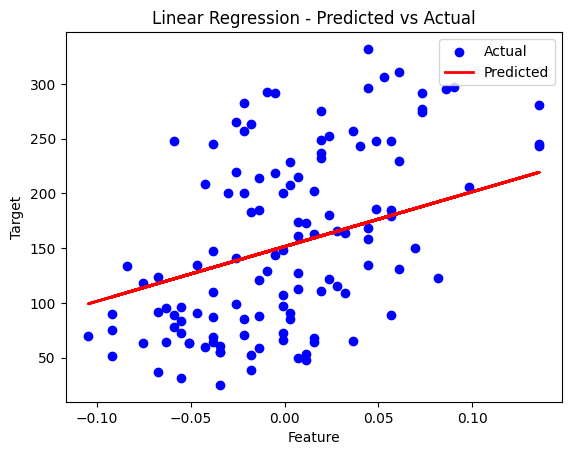

In [109]:
#TODO
import matplotlib.pyplot as plt
#use r2_score for to compare predictions
r2 = r2_score(y_test, y_predictions)
print(r2)
# Plot the predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_predictions, color='red', linewidth=2, label='Predicted')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression - Predicted vs Actual')
plt.legend()
plt.show()


# Logistic Regression (15 + 50)

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables.

$S(h(x)) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x_1 + \theta_1 x_2 + \cdots + \theta_n x_n})} = \frac{1}{1 + e^{-\theta^T x}} \tag{2}$

The sigmoid function is of importance here and is defined as:

$S(x) = \frac{1}{1 + e^{-x}}$






Calculate the sigmoid function and visualize it.

In [121]:
import math
def sigmoid(x):  
    result = 1/(1+np.exp(-x))
    return result

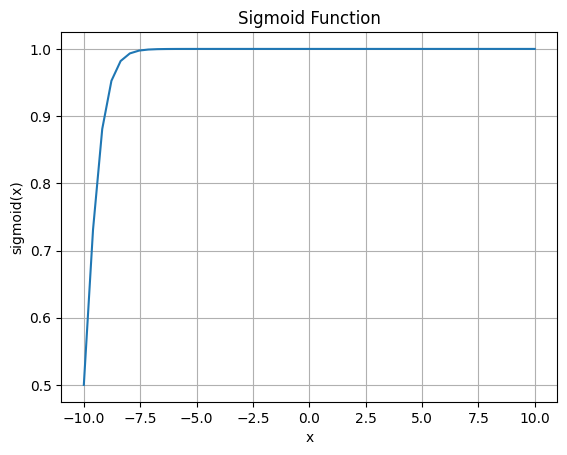

In [130]:
#TODO: visualize the sigmoid function for arbitary range of x. you can use np.linspace
x = np.linspace(-10, 10, 50)  
y = list()
for i in range(len(x)):
    y.append(sigmoid(i))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()

#Dataset
Load the given dataset (same as naive bayes). Add a new column at the end of the dataset containing only 1s.

In [173]:
with open("data.txt", 'r') as file:
    line_count = 0
    for line in file:
        line_count += 1

data = list()

with open("data.txt", 'r') as file:
    for i in range(line_count):
        file_contents = file.readline()
        splited = file_contents.split()
        splited[0] = float(splited[0])
        splited[1] = float(splited[1])
        splited[2] = int(splited[2])
        data.append(splited)
data = np.array(data)
labels = np.array(data[:,-1])
final = list()
for i in range(len(data)):
    final.append((data[i][0],data[i][1],data[i][2],1))
final = np.array(final)
print(final)

[[ 0.10635  0.12803  0.       1.     ]
 [ 0.02403 -0.07484  1.       1.     ]
 [ 0.02237  0.01745  0.       1.     ]
 ...
 [-0.15642  0.08101  0.       1.     ]
 [-0.02797 -0.00697  0.       1.     ]
 [ 0.0743  -0.09015  1.       1.     ]]


### Predictions

Simply implement the math above to make predictions. Since we are using numbers here, define the threshold of 0.5 for classification.

In [174]:
#we use sigmoid function to map the z value between 0 and 1
def predict(weights, x):
    z = np.dot(weights, x)    
    probability = sigmoid(z)
    if probability >= 0.5:
        prediction = 1
    else:
        prediction = 0
    
    return prediction

### Loss Function
Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

In binary classification, where the number of classes M
 equals 2, cross-entropy can be calculated as:

$−(ylog(p)+(1−y)log(1−p))$


In [175]:
def cross_entropy(y_true, y_pred):
  #TODO: calculate cross entropy using the formula above
    result = -1 * (y_true*np.log(y_pred) + (1-y_true) * np.log(1-y_pred))

### Gradient Descent

Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function. Gradient descent in machine learning is simply used to find the values of a function's parameters (coefficients) that minimize a cost function as far as possible.

$\theta := \theta - \alpha \nabla_\theta H \tag{6}$

In [176]:
# use difference between predictions and y and then use np.dot for derivations
def gradient_descent(X, y, weight, num_of_epochs, learning_rate=0.005):
    m = len(X)  # Number of training examples
    while num_of_epochs>0:
        for i in range(num_of_epochs):
            y_pred = sigmoid(np.dot(X, weight))
            gradient = np.dot(X.T, (y_pred - y)) / m
            weight -= learning_rate * gradient
            num_of_epochs -= 1

    return weight


In [177]:
def LR(train_set, labels, test_set, num_of_epochs, learning_rate = 0.005):
  #TODO: simply gather all the functions you already implemented in this section to make valid and complete predictions for a given dataset
    weights = np.zeros(train_set.shape[1])
    print(num_of_epochs)
    weights, _ = gradient_descent(train_set, labels, weights, num_of_epochs,learning_rate)
    predictions = predict(test_set, weights)
    
    return predictions

### Test

To test the model, import a suitable dataset from sklearn library to check the accuracy of your model. Then import LogisticRegression from sklearn and compare your model's result with it.



In [189]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

def accuracy(ground_truth, predictions):
    accuracy = accuracy_score(ground_truth, model_predictions)    
    return accuracy

X_train, X_test, y_train, y_test = train_test_split(final, labels,123)
test = list()
for i in range(len(X_test)):
    test.append((X_test[i][0],X_test[i][1]))
test = np.array(test)
my_model_predictions = LR(X_train,labels,X_test,1000)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gaussian_predictions = gaussian.predict(X_test)
my_accuracy = accuracy(y_test, my_model_predictions)
gaussian_accuract  = accuracy(y_test,gaussian_predictions)
print(my_accuracy)

1000


ValueError: operands could not be broadcast together with shapes (877,) (1000,) 

In [ ]:
# compare with sklearn.linear_model.LogisticRegression

### Visualization

During your model's training, save the accuracy and loss of each epoch, and then plot them using the imported libraries. Explain the pattern. If the result is not satisfactory, change the learning rate, num of epochs, initial weights, etc and observe their effects on the result.